# Gradient Descent Intro
 <p>

In [19]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([0.7051, 0.4374, 0.8673, 0.228 , 0.2006, 0.4479, 0.9909, 0.8309, 0.837 , 0.303 , 0.0057,
       0.8332, 0.8831, 0.5038, 0.9714, 0.8727, 0.2448, 0.8957, 0.0419, 0.8053, 0.3584, 0.6068,
       0.2793, 0.6097, 0.2924, 0.8753, 0.5123, 0.49  , 0.1365, 0.8358])

In [6]:
y

array([10.1154,  9.3123, 10.6018,  8.6841,  8.6017,  9.3436, 10.9727, 10.4926, 10.5109,  8.9089,
        8.0171, 10.4997, 10.6492,  9.5114, 10.9141, 10.6181,  8.7344, 10.687 ,  8.1258, 10.4159,
        9.0753,  9.8204,  8.8379,  9.8292,  8.8773, 10.6258,  9.5368,  9.47  ,  8.4094, 10.5074])

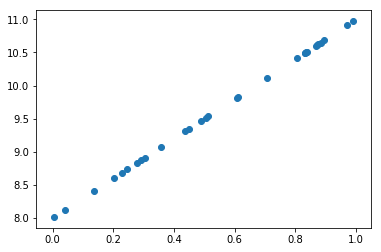

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.329329717598128

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [20]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani